In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from src.decision_tree import DecisionTree
from src.random_forest import RandomForest
from src.aux_functions import *

## Levanto los datos

In [2]:
df = pd.read_csv('datasets/german_credit.csv')
df

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


## Discretización

### Duration of Credit (month)

In [3]:
for i, row in df.iterrows():
    key = 'Duration of Credit (month)'
    val = row[key]
    if val < 12:
        df.at[i,key] = 1
    elif val >=12 and val < 18:
        df.at[i, key] = 2
    elif val >=18 and val < 25:
        df.at[i, key] = 3
    else:
        df.at[i, key] = 4

In [4]:
df['Duration of Credit (month)'].unique()

array([3, 1, 2, 4])

### Credit Amount

In [5]:
for i, row in df.iterrows():
    key = 'Credit Amount'
    val = row[key]
    if val < 1200:
        df.at[i,key] = 1
    elif val >=1200 and val < 2000:
        df.at[i, key] = 2
    elif val >=2000 and val < 3000:
        df.at[i, key] = 3
    elif val >=3000 and val < 5000:
        df.at[i, key] = 4
    else:
        df.at[i, key] = 5

In [6]:
df['Credit Amount'].unique()

array([1, 3, 4, 2, 5])

### Age (years)

In [7]:
for i, row in df.iterrows():
    key = 'Age (years)'
    val = row[key]
    if val < 27:
        df.at[i,key] = 1
    elif val >=27 and val < 34:
        df.at[i, key] = 2
    elif val >=34 and val < 44:
        df.at[i, key] = 3
    else:
        df.at[i, key] = 4

In [8]:
df['Age (years)'].unique()

array([1, 3, 4, 2])

In [9]:
for key in df:
    print(f"{key}: {sorted(df[key].unique())}")

Creditability: [0, 1]
Account Balance: [1, 2, 3, 4]
Duration of Credit (month): [1, 2, 3, 4]
Payment Status of Previous Credit: [0, 1, 2, 3, 4]
Purpose: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]
Credit Amount: [1, 2, 3, 4, 5]
Value Savings/Stocks: [1, 2, 3, 4, 5]
Length of current employment: [1, 2, 3, 4, 5]
Instalment per cent: [1, 2, 3, 4]
Sex & Marital Status: [1, 2, 3, 4]
Guarantors: [1, 2, 3]
Duration in Current address: [1, 2, 3, 4]
Most valuable available asset: [1, 2, 3, 4]
Age (years): [1, 2, 3, 4]
Concurrent Credits: [1, 2, 3]
Type of apartment: [1, 2, 3]
No of Credits at this Bank: [1, 2, 3, 4]
Occupation: [1, 2, 3, 4]
No of dependents: [1, 2]
Telephone: [1, 2]
Foreign Worker: [1, 2]


In [10]:
data = df.copy()

## Ejercicio a)

In [30]:
training, testing = train_test_split(data, test_size=0.1)
print(f"amount of training: {len(training)}")
print(f"amount of testing: {len(testing)}")

amount of training: 900
amount of testing: 100


## Ejercicio d)

In [50]:
config = {
    'gain_function': 'shannon',
    'objective':'Creditability',
    'max_depth': 7
}
etree = DecisionTree(training, config, simplify=False)
forest = RandomForest(training, config, sample_proportion=0.7, tree_count=5)

In [32]:
#dot = etree.digraph()
#dot.format = 'png'
#dot.render(filename='ej1b', directory='./graphics')

#Image('graphics/ej1b.png')

In [51]:
expected = list(testing['Creditability'])
test = testing.to_dict('records')
predicted_tree = etree.predict(test, debug=False)
predicted_forest = forest.predict(test)

In [34]:
count_tp = 0
count_tn = 0
count_fp = 0
count_fn = 0
for e_i, a_i in zip(expected, predicted_tree):
    if str(e_i) == str(a_i):
        if str(e_i) == str(0):
            count_tn += 1
        elif str(e_i) == str(1):
            count_tp += 1
    elif str(e_i) != str(a_i):
        if str(e_i) == str(0):
            count_fp += 1
        elif str(e_i) == str(1):
            count_fn += 1

print(f"tree tp {count_tp}")
print(f"tree tn {count_tn}")
print(f"tree fn {count_fn}")
print(f"tree fp {count_fp}")

tree tp 55
tree tn 17
tree fn 10
tree fp 18


In [52]:
matrix_tree = confusion_matrix(predicted_tree, expected, [0, 1])
matrix_forest = confusion_matrix(predicted_forest, expected, [0, 1])

tree matrix
precision = 0.59


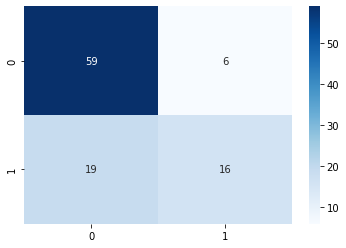

In [53]:
print("tree matrix")
heatmap(matrix_tree, annot=True, cmap='Blues', fmt='g')
tp_t = matrix_tree[0][0]
print(f"precision = {tp_t/len(predicted_tree)}")

forest matrix
precision = 0.62


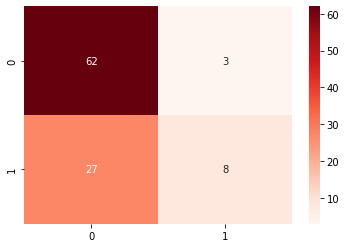

In [54]:
print("forest matrix")
heatmap(matrix_forest, annot=True, cmap='Reds', fmt='g')
tp_f= matrix_forest[0][0]
print(f"precision = {tp_f/len(predicted_forest)}")
#print(f"precision = {precision(matrix_forest)}")

In [38]:
testm = np.zeros((2,2))
testm[0][0] = 1 #tp
testm[1][0] = 2 #fp
testm[0][1] = 3 #fn
testm[1][1] = 4 #tn
#heatmap(testm, annot=True, cmap='Greys', fmt='g')

## Ejercicio e)

In [39]:
def precision(matrix):
    tp = matrix[0][0]
    tn = matrix[1][1]
    fp = matrix[1][0]
    fn = matrix[0][1]
    return tp / (tn + fp + fn + tp)

def plot_multiple(*plots, title=None, marker=None):
    _, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_title(title)
    colors = ["red", "blue", "green", "yellow", "purple"]
    for i, plot in enumerate(plots):
        color = colors[i] if i < len(colors) else None
        (
            x,
            y,
            e,
            title,
        ) = plot
        ax.plot(x, y, color=color, label=title, marker=marker)
        y = np.asarray(y)
        e = np.asarray(e)
        ax.fill_between(x, (y - e), (y + e), color=color, alpha=0.2)
        ax.set_xlabel("nodos")
        ax.set_ylabel("Precisión")
    ax.legend()
    return ax

In [40]:
iterations = 1
max_depth = 15 + 1
x_values = range(3, max_depth)
y_train = []
e_train = []
y_test = []
e_test = []

for k in x_values:
    iterations_test = []
    iterations_train = []
    config = {
    'gain_function': 'shannon',
    'objective':'Creditability',
    'max_depth': k
    }
    etree = DecisionTree(training, config, simplify=False)
    expected_train = list(training['Creditability'])
    expected_test = list(testing['Creditability'])
    test = testing.to_dict('records')
    train = training.to_dict('records')
        
    predicted_test = etree.predict(test)
    predicted_train = etree.predict(train)
        
    matrix_test = confusion_matrix(predicted_test, expected_test, [0, 1])
    matrix_train = confusion_matrix(predicted_train, expected_train, [0, 1])
        
    p_test = precision(matrix_test)
    p_train = precision(matrix_train)
        
    iterations_test.append(p_test)
    iterations_train.append(p_train)
        
    y_train.append(np.mean(iterations_train))
    e_train.append(np.std(iterations_train))
    
    y_test.append(np.mean(iterations_test))
    e_test.append(np.std(iterations_test))

<AxesSubplot:title={'center':'Arbol'}, xlabel='nodos', ylabel='Precisión'>

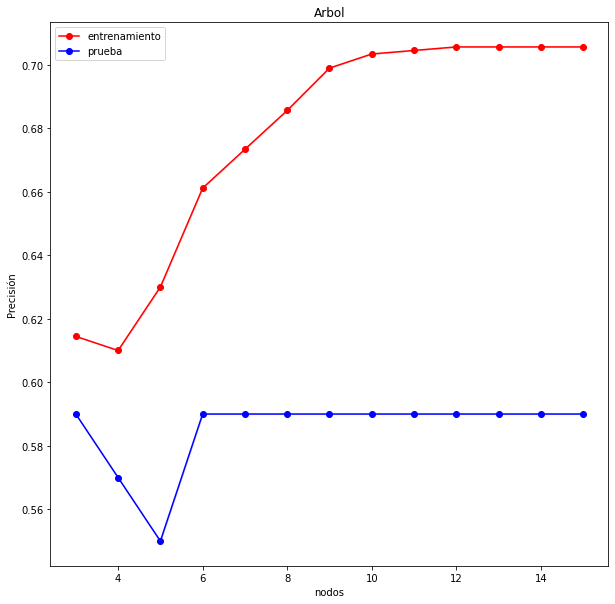

In [41]:
plt_train = (x_values, y_train, e_train, 'entrenamiento')
plt_test = (x_values, y_test, e_test, 'prueba')

plot_multiple(plt_train, plt_test, title='Arbol', marker='o')

In [47]:
def variable_tree_forest(tree_count):
    iterations = 1
    max_depth = 10 + 1
    x_values = range(3, max_depth)
    y_train = []
    e_train = []
    y_test = []
    e_test = []
    for k in x_values:
        iterations_test = []
        iterations_train = []
        config = {
        'gain_function': 'shannon',
        'objective':'Creditability',
        'max_depth': k
        }
        etree = RandomForest(training, config, sample_proportion=0.7, tree_count=tree_count)
        expected_train = list(training['Creditability'])
        expected_test = list(testing['Creditability'])
        test = testing.to_dict('records')
        train = training.to_dict('records')
            
        predicted_test = etree.predict(test)
        predicted_train = etree.predict(train)
            
        matrix_test = confusion_matrix(predicted_test, expected_test, [0, 1])
        matrix_train = confusion_matrix(predicted_train, expected_train, [0, 1])
            
        p_test = precision(matrix_test)
        p_train = precision(matrix_train)
            
        iterations_test.append(p_test)
        iterations_train.append(p_train)
            
        y_train.append(np.mean(iterations_train))
        e_train.append(np.std(iterations_train))
        
        y_test.append(np.mean(iterations_test))
        e_test.append(np.std(iterations_test))
    plt_train = (x_values, y_train, e_train, 'entrenamiento')
    plt_test = (x_values, y_test, e_test, 'prueba')
    return plt_train, plt_test

In [43]:
ptrain, ptest = variable_tree_forest(3)

<AxesSubplot:title={'center':'Forest 3 Arboles'}, xlabel='nodos', ylabel='Precisión'>

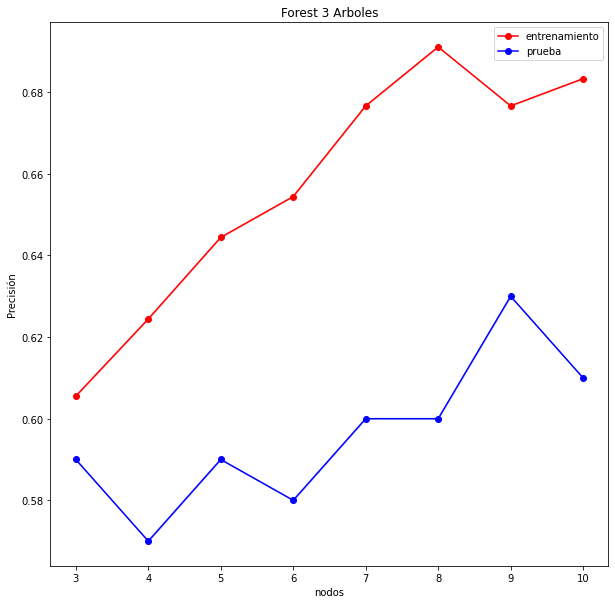

In [44]:
plot_multiple(ptrain, ptest, title='Forest 3 Arboles', marker='o')

In [48]:
ptrain, ptest = variable_tree_forest(7)

<AxesSubplot:title={'center':'Forest 7 Arboles'}, xlabel='nodos', ylabel='Precisión'>

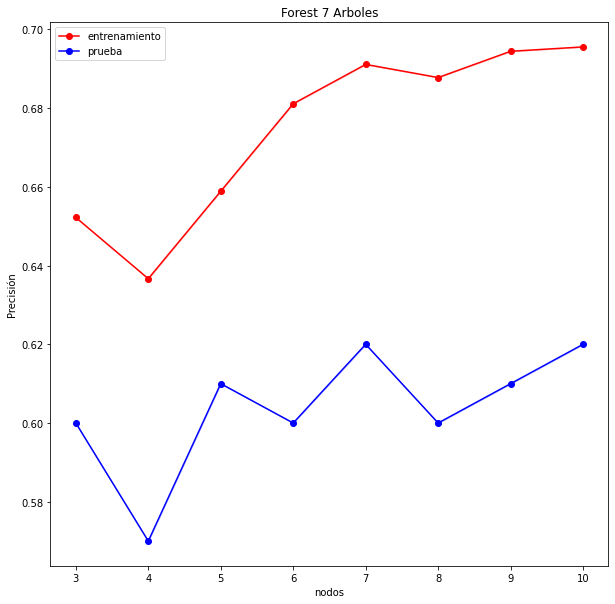

In [49]:
plot_multiple(ptrain, ptest, title='Forest 7 Arboles', marker='o')